# 따릉이 대여 여부 예측

## 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,classification_report
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
train=pd.read_csv('C:/Users/Administrator/Downloads/train.csv')
test=pd.read_csv('C:/Users/Administrator/Downloads/test.csv')

<AxesSubplot:xlabel='Rented Bike Count', ylabel='count'>

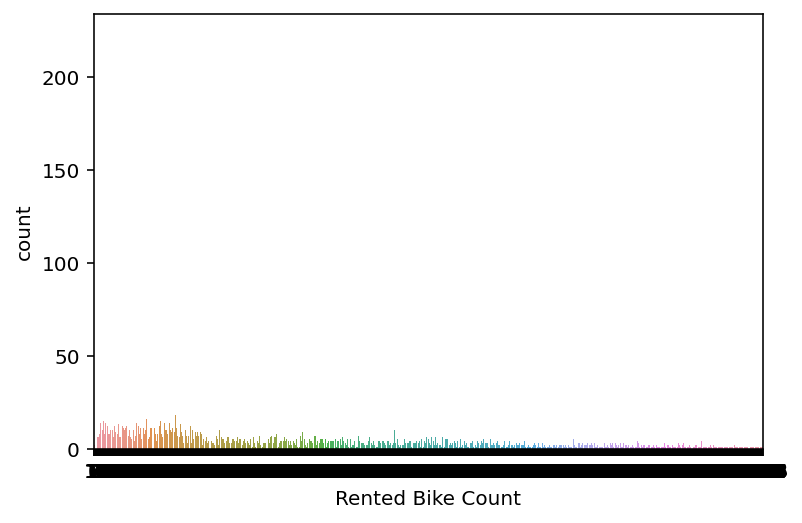

In [3]:
sns.countplot(train['Rented Bike Count'])

In [4]:
train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
print(train.shape,test.shape)

(8040, 14) (720, 13)


In [7]:
test.info

<bound method DataFrame.info of            Date  Hour  Temperature(째C)  Humidity(%)  Wind speed (m/s)  \
0    01/11/2018     0              5.7           62               2.3   
1    01/11/2018     1              5.1           65               1.6   
2    01/11/2018     2              4.4           64               NaN   
3    01/11/2018     3              4.2           65               0.7   
4    01/11/2018     4              3.6           70               0.8   
..          ...   ...              ...          ...               ...   
715  30/11/2018    19              4.2           34               2.6   
716  30/11/2018    20              3.4           37               2.3   
717  30/11/2018    21              2.6           39               0.3   
718  30/11/2018    22              2.1           41               1.0   
719  30/11/2018    23              1.9           43               1.3   

     Visibility (10m)  Dew point temperature(째C)  Solar Radiation (MJ/m2)  \
0             

In [8]:
test.info

<bound method DataFrame.info of            Date  Hour  Temperature(째C)  Humidity(%)  Wind speed (m/s)  \
0    01/11/2018     0              5.7           62               2.3   
1    01/11/2018     1              5.1           65               1.6   
2    01/11/2018     2              4.4           64               NaN   
3    01/11/2018     3              4.2           65               0.7   
4    01/11/2018     4              3.6           70               0.8   
..          ...   ...              ...          ...               ...   
715  30/11/2018    19              4.2           34               2.6   
716  30/11/2018    20              3.4           37               2.3   
717  30/11/2018    21              2.6           39               0.3   
718  30/11/2018    22              2.1           41               1.0   
719  30/11/2018    23              1.9           43               1.3   

     Visibility (10m)  Dew point temperature(째C)  Solar Radiation (MJ/m2)  \
0             

Text(0.5, 1.0, 'correlation heatmap')

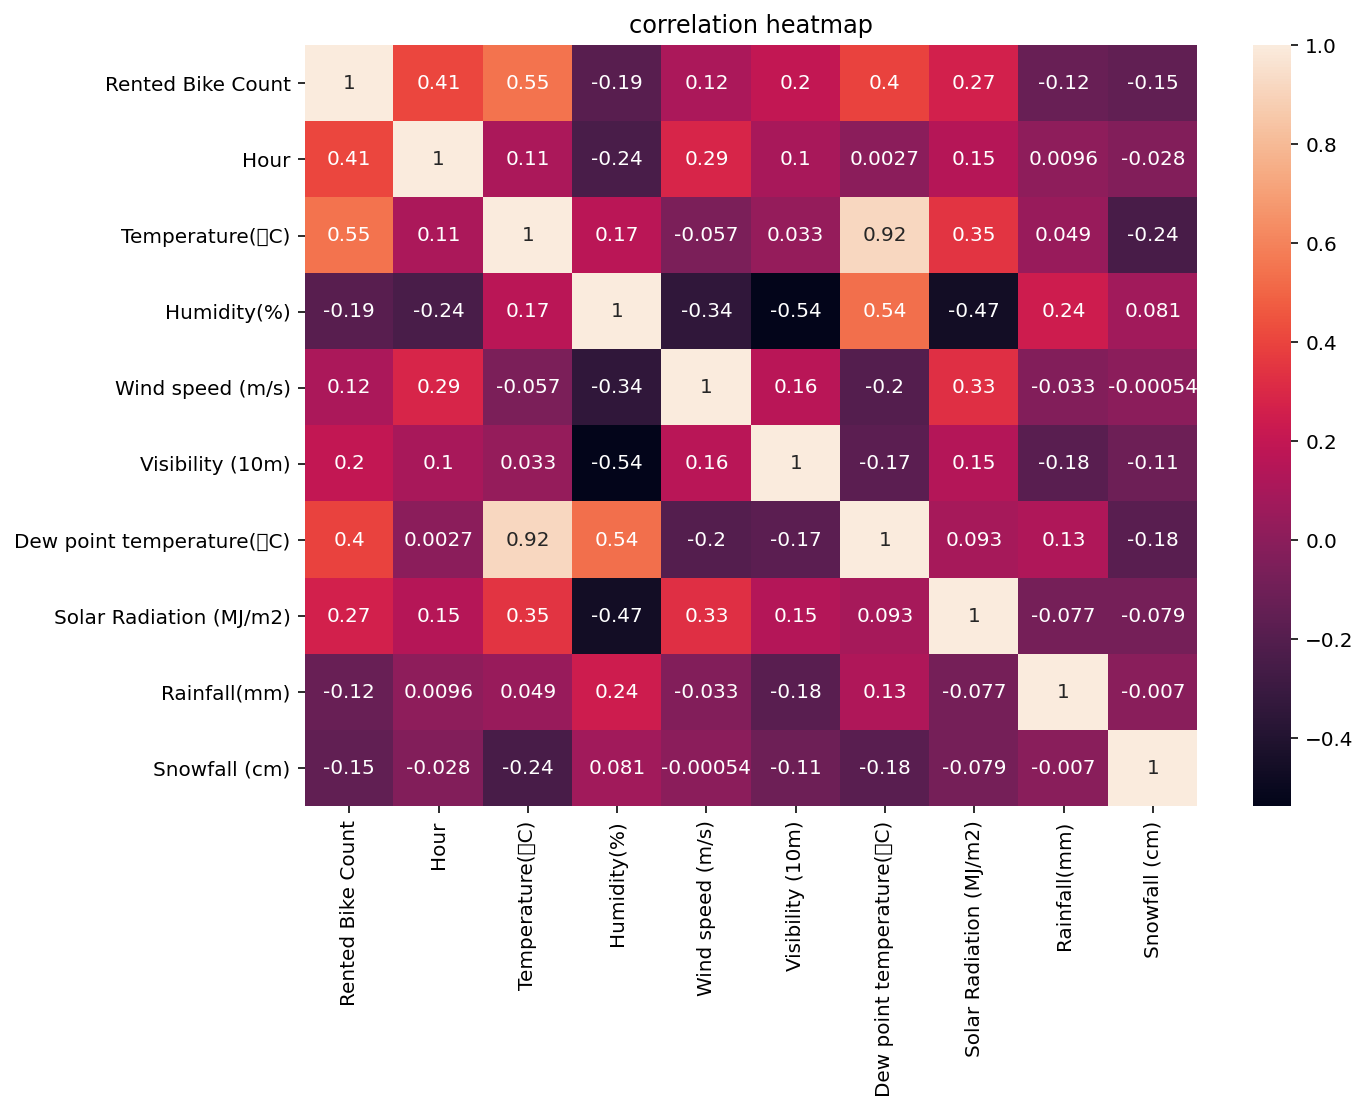

In [9]:
plt.figure(figsize=(10,7)) 
sns.heatmap(train.corr(),annot=True)
plt.title('correlation heatmap')

Text(0.5, 1.0, 'correlation heatmap')

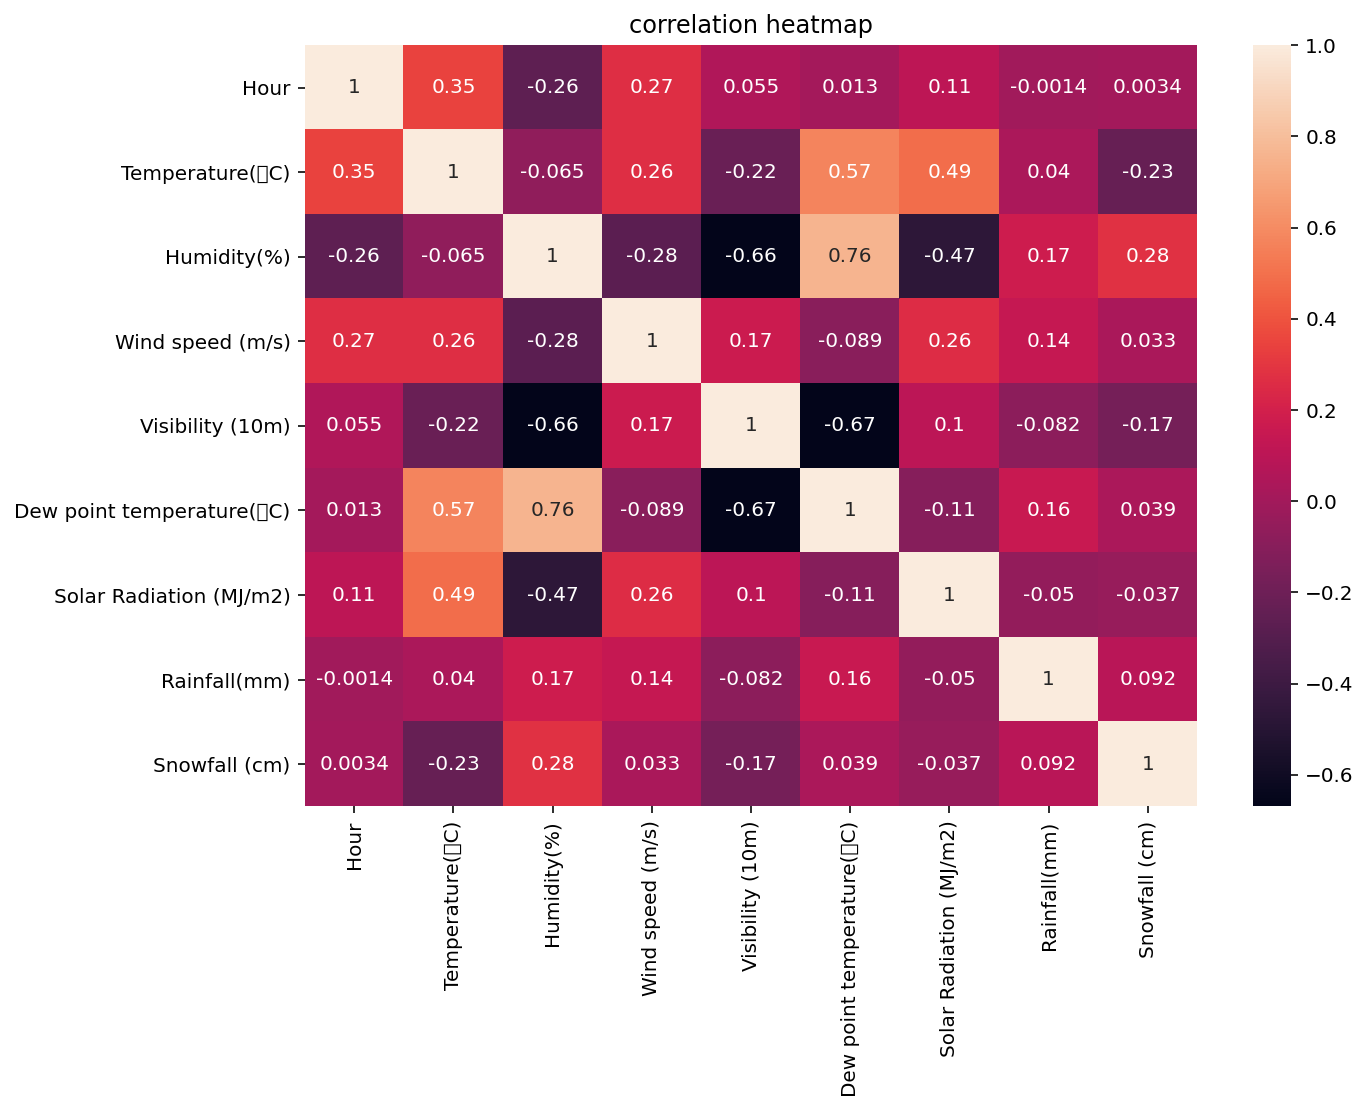

In [10]:
plt.figure(figsize=(10,7)) 
sns.heatmap(test.corr(),annot=True)
plt.title('correlation heatmap')

## 데이터 1차 전처리 수행

In [11]:
train.isna().sum(axis=0).sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Temperature(째C)              800
Wind speed (m/s)             802
Seasons                      802
dtype: int64

In [12]:
import pandas as pd
df=pd.DataFrame(train)

In [13]:
df["Temperature(째C)"]=train["Temperature(째C)"].fillna(round(train["Temperature(째C)"].mode()[0]))

In [14]:
train["Temperature(째C)"].describe()

count    8040.000000
mean       14.145473
std        11.805459
min       -17.800000
25%         4.800000
50%        17.700000
75%        22.400000
max        39.400000
Name: Temperature(째C), dtype: float64

<AxesSubplot:xlabel='Temperature(째C)'>

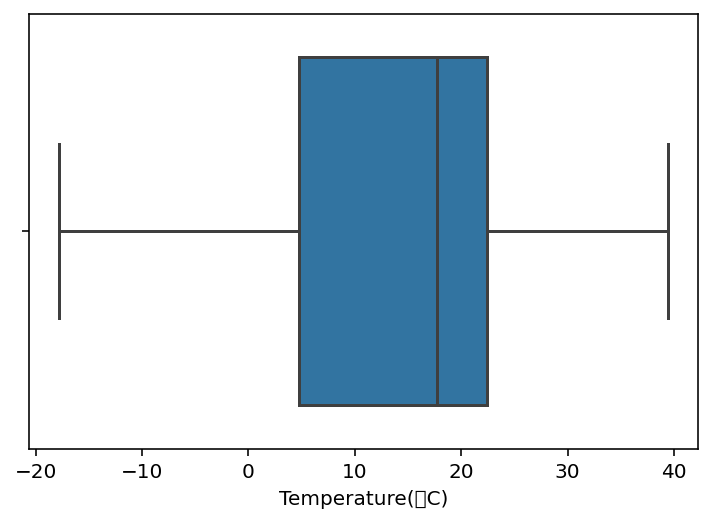

In [15]:
sns.boxplot(train["Temperature(째C)"])

In [16]:
train._get_numeric_data().corr()["Wind speed (m/s)"].sort_values()

Humidity(%)                 -0.344381
Dew point temperature(째C)   -0.196218
Temperature(째C)             -0.056631
Rainfall(mm)                -0.032976
Snowfall (cm)               -0.000537
Rented Bike Count            0.115569
Visibility (10m)             0.160908
Hour                         0.287398
Solar Radiation (MJ/m2)      0.330732
Wind speed (m/s)             1.000000
Name: Wind speed (m/s), dtype: float64

In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [19]:
import missingno as msno 
from fancyimpute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

(CVXPY) Feb 16 01:26:42 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Feb 16 01:26:42 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Feb 16 01:26:42 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')


In [20]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(train[['Humidity(%)', 'Dew point temperature(째C)', 'Wind speed (m/s)']])
df["Wind speed (m/s)"]=pd.DataFrame(imputed_arr, columns=['Humidity(%)', 'Dew point temperature(째C)', 'Wind speed (m/s)'])["Wind speed (m/s)"].round()

In [21]:
train["Wind speed (m/s)"].describe()

count    8040.000000
mean        1.760697
std         1.045047
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: Wind speed (m/s), dtype: float64

<AxesSubplot:xlabel='Wind speed (m/s)'>

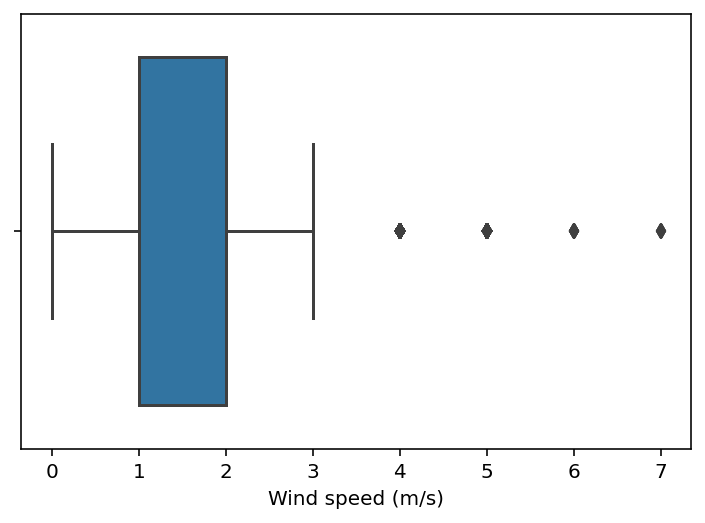

In [22]:
sns.boxplot(train["Wind speed (m/s)"])

In [23]:
df['Date']=pd.to_datetime(df['Date'])

In [24]:
def get_Seasons(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [25]:
df['Seasons'] = df.apply(lambda row: row['Seasons'] if pd.notnull(row['Seasons']) else get_Seasons(row['Date'].month), axis=1)

In [26]:
df.isna().sum(axis=0).sort_values()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [27]:
train.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [28]:
df

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,2.0,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,2018-10-31,1176,20,7.6,59,1.0,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,2018-10-31,1088,22,6.8,58,2.0,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [29]:
df.corr()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410766,0.509926,-0.188578,0.108666,0.196718,0.398034,0.265525,-0.123920,-0.150621
Hour,0.410766,1.000000,0.104423,-0.239905,0.262716,0.103468,0.002658,0.148370,0.009635,-0.027758
Temperature(째C),0.509926,0.104423,1.000000,0.157715,-0.057526,0.030744,0.851336,0.324773,0.046247,-0.226080
Humidity(%),-0.188578,-0.239905,0.157715,1.000000,-0.338562,-0.537763,0.535527,-0.465179,0.241985,0.080777
Wind speed (m/s),0.108666,0.262716,-0.057526,-0.338562,1.000000,0.155340,-0.191530,0.312122,-0.044542,-0.005876
Visibility (10m),0.196718,0.103468,0.030744,-0.537763,0.155340,1.000000,-0.174204,0.145593,-0.178202,-0.110523
Dew point temperature(째C),0.398034,0.002658,0.851336,0.535527,-0.191530,-0.174204,1.000000,0.093286,0.125273,-0.179787
Solar Radiation (MJ/m2),0.265525,0.148370,0.324773,-0.465179,0.312122,0.145593,0.093286,1.000000,-0.077066,-0.078547
Rainfall(mm),-0.123920,0.009635,0.046247,0.241985,-0.044542,-0.178202,0.125273,-0.077066,1.000000,-0.007033
Snowfall (cm),-0.150621,-0.027758,-0.226080,0.080777,-0.005876,-0.110523,-0.179787,-0.078547,-0.007033,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

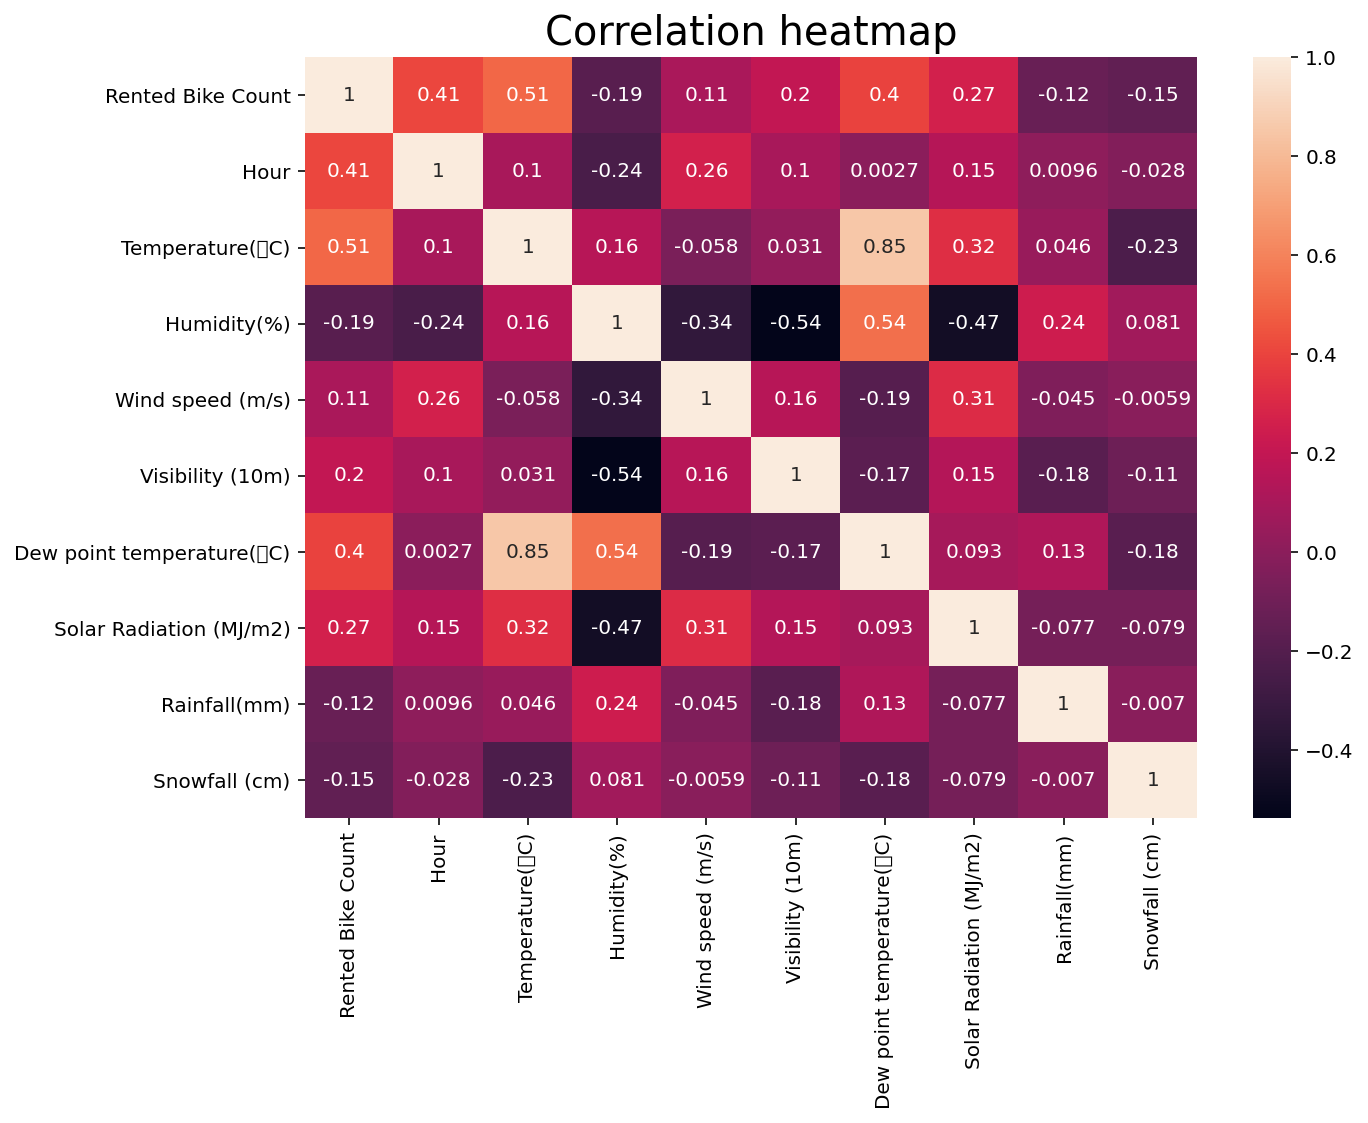

In [30]:
plt.figure(figsize=(10,7)) #사이즈
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation heatmap", fontsize=20) 

In [31]:
df_train=df
df_train

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,2.0,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,2018-10-31,1176,20,7.6,59,1.0,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,2018-10-31,1088,22,6.8,58,2.0,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [32]:
test.isna().sum(axis=0).sort_values()

Date                          0
Hour                          0
Humidity(%)                   0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Holiday                       0
Functioning Day               0
Wind speed (m/s)             74
Seasons                      74
Temperature(째C)              76
dtype: int64

In [33]:
df1=pd.DataFrame(test)

In [34]:
df1['Date']=pd.to_datetime(df1['Date'])
df1["Date"]

0     2018-01-11
1     2018-01-11
2     2018-01-11
3     2018-01-11
4     2018-01-11
         ...    
715   2018-11-30
716   2018-11-30
717   2018-11-30
718   2018-11-30
719   2018-11-30
Name: Date, Length: 720, dtype: datetime64[ns]

In [35]:
def get_Seasons(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [36]:
df1['Seasons'] = df.apply(lambda row: row['Seasons'] if pd.notnull(row['Seasons']) else get_Seasons(row['Date'].month), axis=1)

In [37]:
df1.isna().sum(axis=0).sort_values()

Date                          0
Hour                          0
Humidity(%)                   0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                       0
Holiday                       0
Functioning Day               0
Wind speed (m/s)             74
Temperature(째C)              76
dtype: int64

In [38]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(test[['Humidity(%)', 'Dew point temperature(째C)', 'Wind speed (m/s)']])
df1["Wind speed (m/s)"]=pd.DataFrame(imputed_arr, columns=['Humidity(%)', 'Dew point temperature(째C)', 'Wind speed (m/s)'])["Wind speed (m/s)"].round()

In [39]:
df1["Temperature(째C)"]=test["Temperature(째C)"].fillna(round(test["Temperature(째C)"].mode()[0]))

In [40]:
df1.isna().sum(axis=0).sort_values()

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [41]:
df1

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-01-11,0,5.7,62,2.0,1909,-1.0,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2018-01-11,1,5.1,65,2.0,1932,-0.9,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2018-01-11,2,4.4,64,1.0,2000,-1.8,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2018-01-11,3,4.2,65,1.0,1962,-1.8,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2018-01-11,4,3.6,70,1.0,1934,-1.3,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2018-11-30,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,Winter,No Holiday,Yes
716,2018-11-30,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,Winter,No Holiday,Yes
717,2018-11-30,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,Winter,No Holiday,Yes
718,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2차 전처리

In [42]:
value_to_delete = 0
df = df.drop(df[df['Rented Bike Count'] == value_to_delete].index)
print(df)

           Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8035 2018-10-31               1507    19              8.4           53   
8036 2018-10-31               1176    20              7.6           59   
8037 2018-10-31               1069    21              7.6           59   
8038 2018-10-31               1088    22              6.8           58   
8039 2018-10-31                798    23              6.4           60   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)  \
0                  2.0              2000

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
result_ohe = ohe.fit_transform(df[["Seasons","Holiday","Functioning Day"]])
result_ohe

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [44]:
ohe1 = OneHotEncoder(sparse_output=False)
result_ohe1 = ohe1.fit_transform(df1[["Seasons","Holiday","Functioning Day"]])
result_ohe1

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [45]:
df_ohe1 = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Seasons","Holiday","Functioning Day"]))
df_ohe2 =  pd.DataFrame(result_ohe1, columns=ohe1.get_feature_names_out(["Seasons","Holiday","Functioning Day"]))

In [46]:
df_ohe1

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_Yes
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
7812,1.0,0.0,0.0,0.0,0.0,1.0,1.0
7813,1.0,0.0,0.0,0.0,0.0,1.0,1.0
7814,1.0,0.0,0.0,0.0,0.0,1.0,1.0
7815,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [47]:
df_ohe2

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
715,0.0,0.0,0.0,1.0,1.0,0.0,1.0
716,0.0,0.0,0.0,1.0,1.0,0.0,1.0
717,0.0,0.0,0.0,1.0,1.0,0.0,1.0
718,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [48]:
x_df = df.select_dtypes(include=['object']).columns
new_df_ = df.drop(columns=x_df)
df = pd.concat([df_ohe1, new_df_.reset_index()], axis=1)

In [49]:
y_df = df1.select_dtypes(include=['object']).columns
new_df_2_ = df1.drop(columns=y_df)
df1 = pd.concat([df_ohe2, new_df_2_.reset_index()], axis=1)

In [50]:
df=pd.concat([df,df_ohe1],axis=1)

In [51]:
df1=pd.concat([df1,df_ohe2],axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7817 entries, 0 to 7816
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Seasons_Autumn             7817 non-null   float64       
 1   Seasons_Spring             7817 non-null   float64       
 2   Seasons_Summer             7817 non-null   float64       
 3   Seasons_Winter             7817 non-null   float64       
 4   Holiday_Holiday            7817 non-null   float64       
 5   Holiday_No Holiday         7817 non-null   float64       
 6   Functioning Day_Yes        7817 non-null   float64       
 7   index                      7817 non-null   int64         
 8   Date                       7817 non-null   datetime64[ns]
 9   Rented Bike Count          7817 non-null   int64         
 10  Hour                       7817 non-null   int64         
 11  Temperature(째C)            7817 non-null   float64       
 12  Humidi

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Seasons_Autumn             720 non-null    float64       
 1   Seasons_Spring             720 non-null    float64       
 2   Seasons_Summer             720 non-null    float64       
 3   Seasons_Winter             720 non-null    float64       
 4   Holiday_No Holiday         720 non-null    float64       
 5   Functioning Day_No         720 non-null    float64       
 6   Functioning Day_Yes        720 non-null    float64       
 7   index                      720 non-null    int64         
 8   Date                       720 non-null    datetime64[ns]
 9   Hour                       720 non-null    int64         
 10  Temperature(째C)            720 non-null    float64       
 11  Humidity(%)                720 non-null    int64         
 12  Wind spe

In [55]:
train=df.drop(["Date","Holiday_No Holiday","Holiday_Holiday","Functioning Day_Yes","Seasons_Spring","Seasons_Summer","Seasons_Autumn","Seasons_Winter"], axis=1, inplace = False)
test=df1.drop(["Date","Holiday_No Holiday","Functioning Day_Yes","Functioning Day_No","Seasons_Autumn","Seasons_Winter"], axis=1, inplace = False)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7817 entries, 0 to 7816
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      7817 non-null   int64  
 1   Rented Bike Count          7817 non-null   int64  
 2   Hour                       7817 non-null   int64  
 3   Temperature(째C)            7817 non-null   float64
 4   Humidity(%)                7817 non-null   int64  
 5   Wind speed (m/s)           7817 non-null   float64
 6   Visibility (10m)           7817 non-null   int64  
 7   Dew point temperature(째C)  7817 non-null   float64
 8   Solar Radiation (MJ/m2)    7817 non-null   float64
 9   Rainfall(mm)               7817 non-null   float64
 10  Snowfall (cm)              7817 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 671.9 KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             720 non-null    float64
 1   Seasons_Summer             720 non-null    float64
 2   index                      720 non-null    int64  
 3   Hour                       720 non-null    int64  
 4   Temperature(째C)            720 non-null    float64
 5   Humidity(%)                720 non-null    int64  
 6   Wind speed (m/s)           720 non-null    float64
 7   Visibility (10m)           720 non-null    int64  
 8   Dew point temperature(째C)  720 non-null    float64
 9   Solar Radiation (MJ/m2)    720 non-null    float64
 10  Rainfall(mm)               720 non-null    float64
 11  Snowfall (cm)              720 non-null    float64
 12  Seasons_Spring             720 non-null    float64
 13  Seasons_Summer             720 non-null    float64

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

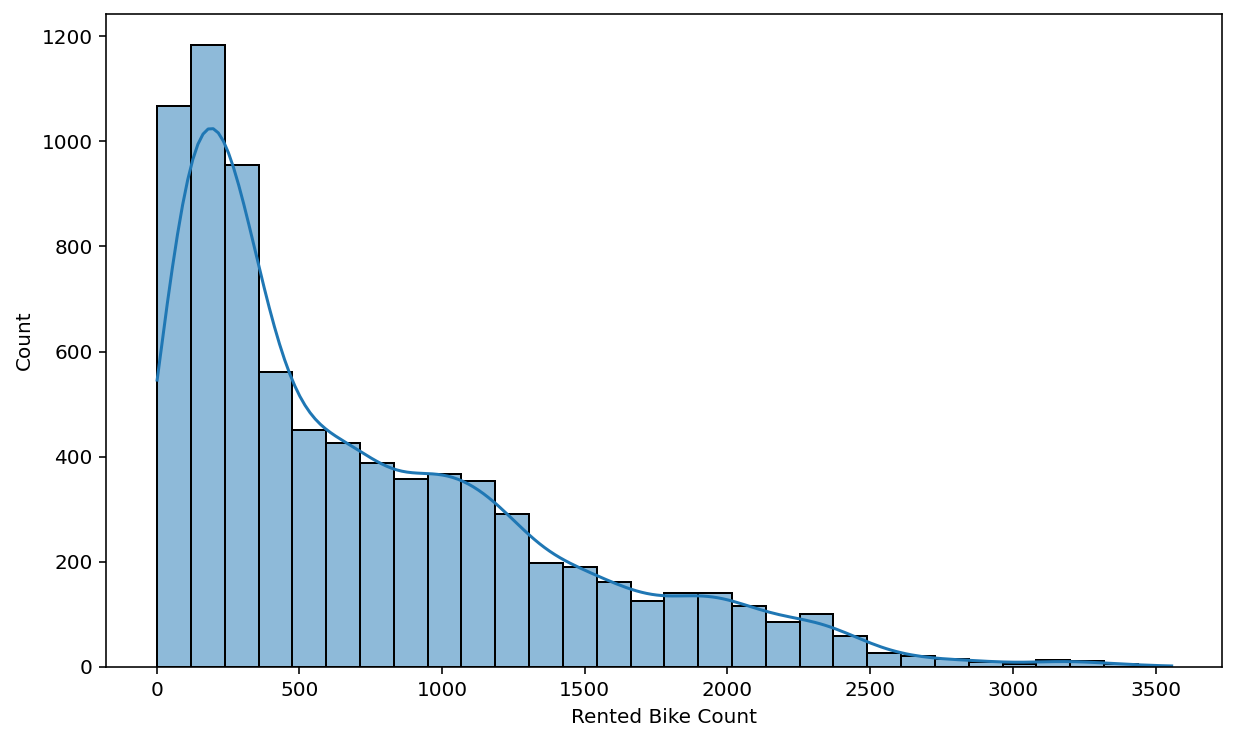

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(train["Rented Bike Count"], kde=True, bins=30)

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

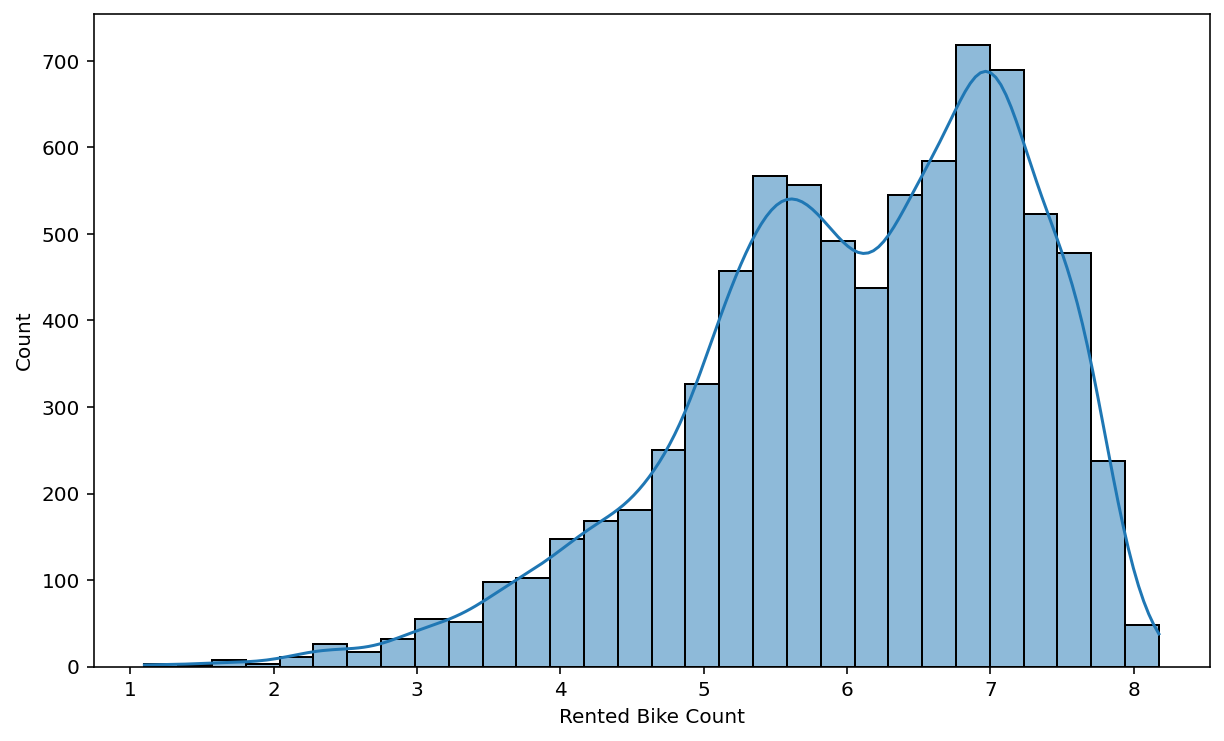

In [60]:
log = np.log1p(train["Rented Bike Count"])
plt.figure(figsize=(10, 6))
sns.histplot(log, kde=True, bins=30)

In [61]:
train["Rented Bike Count"]= np.log1p(train['Rented Bike Count'])

In [62]:
X_train=train.drop("Rented Bike Count",axis=1,inplace=False)
y_train = train["Rented Bike Count"]
X_train

,index,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0
1,1,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0
2,2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0
4,4,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7812,8035,19,8.4,53,2.0,2000,-0.6,0.0,0.0,0.0
7813,8036,20,7.6,59,1.0,2000,0.0,0.0,0.0,0.0
7814,8037,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0
7815,8038,22,6.8,58,2.0,1936,-0.9,0.0,0.0,0.0


In [63]:
x_test = test.copy()

## 변수 스케일링

In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train ,
                                                       y_train ,
                                                       test_size=0.3, 
                                                       random_state=156)

In [66]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
print(X_train_ss.mean())
print(X_val_ss.mean())
print(X_train_ss.std())
print(X_val_ss.std())

-3.5975203400758133e-17
-0.025151043664577644
0.9999999999999999
0.9791668934727223


In [67]:
ma = MaxAbsScaler()
X_train_ma = ma.fit_transform(X_train)
X_val_ma = ma.transform(X_val)
print(X_train_ma.mean())
print(X_val_ma.mean())
print(X_train_ma.std())
print(X_val_ma.std())

0.32663353121730776
0.32071510574395656
0.35251366453074723
0.3533909165987584


In [68]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_val_mm = mm.transform(X_val)
print(X_train_mm.mean())
print(X_val_mm.mean())
print(X_train_mm.std())
print(X_val_mm.std())

0.3922636783715797
0.38719759883966487
0.3334216927393667
0.33332520561507845


In [69]:
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
print(X_train_rs.mean())
print(X_val_rs.mean())
print(X_train_rs.std())
print(X_val_rs.std())

0.0036649300808662888
-0.015831672993390916
0.7919029671312465
0.77266607160827


## 모델

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
model.fit(X_train, y_train).get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [72]:
predict = model.predict(X_val)

In [73]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)

In [74]:
rmse = np.sqrt(mean_squared_error(y_val, predict))
mse = mean_squared_error(y_val, predict) 

In [75]:
print(r_squared)
print(mae)
print(rmse)
print(mse)

0.5964783069385802
0.5477776148429022
0.7368216113155991
0.5429060869017158


In [76]:
model_1=LinearRegression()
model_1.fit(X_train_ss, y_train)
predict = model_1.predict(X_val_ss)
r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
rmse = np.sqrt(mean_squared_error(y_val, predict))
mse = mean_squared_error(y_val, predict)

In [77]:
print(r_squared)
print(mae)
print(rmse)
print(mse)

0.5964783069385804
0.5477776148429021
0.7368216113155991
0.5429060869017157


In [78]:
model_2 = LinearRegression()
model_2.fit(X_train_ma,y_train)
predict = model_2.predict(X_val_ma)
r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
rmse = np.sqrt(mean_squared_error(y_val, predict))
mse = mean_squared_error(y_val, predict)

In [79]:
print(r_squared)
print(mae)
print(rmse)
print(mse)

0.5964783069385804
0.547777614842902
0.736821611315599
0.5429060869017156


In [80]:
model_3 = LinearRegression()
model_3.fit(X_train_mm, y_train)
predict = model_3.predict(X_val_mm)
r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
rmse = np.sqrt(mean_squared_error(y_val, predict))
mse = mean_squared_error(y_val, predict)

In [81]:
print(r_squared)
print(mae)
print(rmse)
print(mse)

0.5964783069385804
0.5477776148429021
0.7368216113155991
0.5429060869017157


In [82]:
model_4 = LinearRegression()
model_4.fit(X_train_rs, y_train)
predict = model_4.predict(X_val_rs)
r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
rmse = np.sqrt(mean_squared_error(y_val, predict))
mse = mean_squared_error(y_val, predict)

In [83]:
print(r_squared)
print(mae)
print(rmse)
print(mse)

0.5964783069385804
0.5477776148429021
0.7368216113155991
0.5429060869017157


## 하이퍼파라미터 튜닝

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [88]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


In [114]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [115]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: -0.1703103882515883


In [116]:
best_rf_model = grid_search.best_estimator_

In [117]:
y_pred = best_rf_model.predict(X_train)

In [118]:
mse = mean_squared_error(y_train, y_pred)
print("Test Mean Squared Error:", mse)

Test Mean Squared Error: 0.023639192323736173


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(model.score(X_train, y_train))
print(model.score(X_val, y_val))

0.5950594280614283
0.5964783069385802


In [109]:
pred = model.predict(X_val)

In [110]:
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

MSE: 0.542906
RMSE: 0.736822
MAE: 0.547778


In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
ms_model = RandomForestClassifier(random_state=42, max_depth= 9,
                                 min_samples_split= 2,n_estimators= 200)


In [113]:
X_test = test.copy()

In [94]:
X_train.columns

Index(['index', 'Hour', 'Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [95]:
X_test.columns

Index(['Seasons_Spring', 'Seasons_Summer', 'index', 'Hour', 'Temperature(째C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer'],
      dtype='object')

In [96]:
missing_columns = set(X_train.columns) - set(X_test.columns)

In [97]:
for column in missing_columns:
    X_test[column] = 0

In [98]:
X_test = X_test[X_train.columns]

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from xgboost import XGBRegressor

final_model = XGBRegressor(random_state=42, n_estimators= 300, max_depth=8, learning_rate=0.05, subsample=0.8)
final_model.fit(X_train, y_train)
test['Rented Bike Count']=0
test['Rented Bike Count'] = final_model.predict(X_test)

In [101]:
test

,Seasons_Spring,Seasons_Summer,index,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Rented Bike Count
0,0.0,0.0,0,0,5.7,62,2.0,1909,-1.0,0.0,0.0,0.0,0.0,0.0,5.766209
1,0.0,0.0,1,1,5.1,65,2.0,1932,-0.9,0.0,0.0,0.0,0.0,0.0,5.694828
2,0.0,0.0,2,2,4.4,64,1.0,2000,-1.8,0.0,0.0,0.0,0.0,0.0,5.311195
3,0.0,0.0,3,3,4.2,65,1.0,1962,-1.8,0.0,0.0,0.0,0.0,0.0,4.749995
4,0.0,0.0,4,4,3.6,70,1.0,1934,-1.3,0.0,0.0,0.0,0.0,0.0,4.365534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.0,0.0,715,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,0.0,0.0,5.759770
716,0.0,0.0,716,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,0.0,0.0,5.620811
717,0.0,0.0,717,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,0.0,0.0,5.640006
718,0.0,0.0,718,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.0,0.0,5.662038


In [102]:
test.to_csv('test_final.csv', index=False)